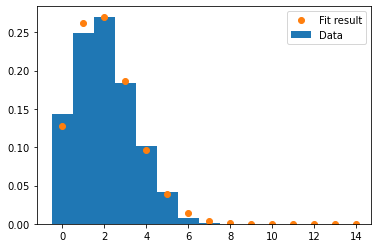

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = np.random.poisson(2, 1000)

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

   direc: array([[1.]])
     fun: 1301.6846199109646
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 1
  status: 0
 success: True
       x: array([0.98402389])


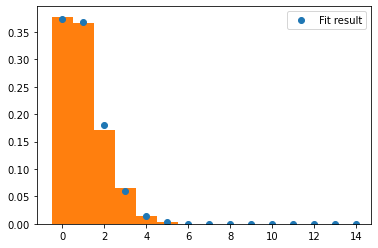

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import factorial
from scipy import stats


def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    """
    The negative log-Likelihood-Function
    """

    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

def negative_log_likelihood(params, data):
    ''' better alternative using scipy '''
    return -stats.poisson.logpmf(data, params[0]).sum()


# get poisson deviated random numbers
data = np.random.poisson(1, 1000)

# minimize the negative log-Likelihood
result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )
# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)

# plot poisson-distribution with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    stats.poisson.pmf(x_plot, result.x),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
bins = np.arange(11) - 0.5
plt.hist(data, bins=bins, density=True, label='Data')
plt.show()

In [15]:
stats.expon(1).ppf(.99)

5.605170185988091

In [16]:
data['0']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1]:
data = pd.read_csv('/tmp/hemoglobin.csv')
data = data['0'] / 4

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(np.nanmax(data)) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

NameError: name 'pd' is not defined

In [51]:
max(data * 4)

32.0

In [30]:
max(data)

8.0

In [40]:
dist = poisson.cdf(np.arange(max(data)*3), *parameters)

In [47]:
idx = len(dist[dist < .99])
dist

array([0.10189586, 0.33460603, 0.60033823, 0.80263165, 0.91813128,
       0.97088698, 0.9909676 , 0.99751905, 0.99938933, 0.99986393,
       0.99997232, 0.99999482, 0.9999991 , 0.99999986, 0.99999998,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [50]:
idx * 4

24

In [18]:
import pandas as pd

In [5]:
peep_ticks = pd.read_csv('/tmp/peep_age_h.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/peep_age_h.csv'

In [6]:
data = peep_ticks.to_numpy()[:,1]

NameError: name 'peep_ticks' is not defined

In [87]:
peep_ticks.to_numpy()[:,1].shape

(475511,)

In [89]:
data[data].plot.hist(bins=50, density=True)

IndexError: arrays used as indices must be of integer (or boolean) type

In [90]:
np.concatenate([data.sort_values(), data.sort_values()[[-1]]]

SyntaxError: unexpected EOF while parsing (<ipython-input-90-ea5ffb73f4af>, line 1)

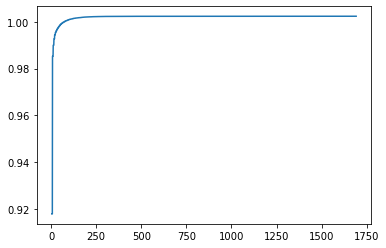

In [131]:
values, base = np.histogram(data, bins=int(data.max()), density=True)

cumulative = np.cumsum(values)
base[cumulative[cumulative < .99].argmax()]
plt.plot(base[:-1], cumulative)

In [135]:
base[cumulative[cumulative < .99].argmax()]

7.990543735224586

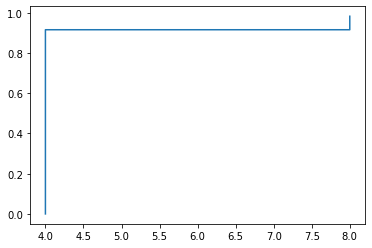

In [110]:
sorted_data = np.sort(data)
plot_data = sorted_data[sorted_data < 11]
plt.step(np.concatenate([plot_data, plot_data[[-1]]]),
        np.arange(plot_data.size+1) / sorted_data.size)

In [108]:
np.concatenate([plot_data, plot_data[[-1]]]),

(array([4., 4., 4., ..., 8., 8., 8.]),)

In [109]:
np.arange(plot_data.size+1) / sorted_data.size

array([0.00000000e+00, 2.10300077e-06, 4.20600154e-06, ...,
       9.82923634e-01, 9.82925737e-01, 9.82927840e-01])

In [47]:
result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )

In [48]:
result

   direc: array([[-0.1399797]])
     fun: 24306616.76356699
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 2
  status: 0
 success: True
       x: array([60.23667629])

In [53]:
stats.expon(60.23667629).ppf(.10)

60.34203680565783

In [54]:
60.34203680565783 * 4

241.3681472226313

In [55]:
241 * 24

5784